In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("final.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTATS,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTATS   506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# housing['CHAS'].value_counts()

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTATS,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# housing['ZN'].value_counts()

In [8]:
# %matplotlib inline

In [9]:
# import matplotlib.pyplot as plt

In [10]:
# housing.hist(bins=50, figsize=(20,15))

In [11]:
##TRAIN-TEST SPLITTING

In [12]:
# just to show how the function that is built-in in sklearn actually works.
import numpy as np
# def split_train_test(data, test_ratio): 
#     np.random.seed(42) #fixing the shuffled values
#     shuffled=np.random.permutation(len(data))
#     test_set_size=int(len(data)*test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
# train_set, test_set=split_train_test(housing, 0.2)
# print(len(train_set))
# print(len(test_set))



In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size=0.2,random_state=42)
print(len(train_set))
print(len(test_set))

404
102


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [16]:
# strat_test_set['CHAS'].value_counts()


In [17]:
# strat_train_set['CHAS'].value_counts()

In [18]:
# 95/7


In [19]:
# 376/28

In [20]:
##Looking for correlations
corr_matrix=housing.corr()
(corr_matrix['MEDV']).sort_values(ascending=False)


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTATS    -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTATS', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTATS', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTATS', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTATS'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTATS'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTATS'>,
        <AxesSubplot:xlabel='LSTATS', ylabel='LSTATS'>]], dtype=object)

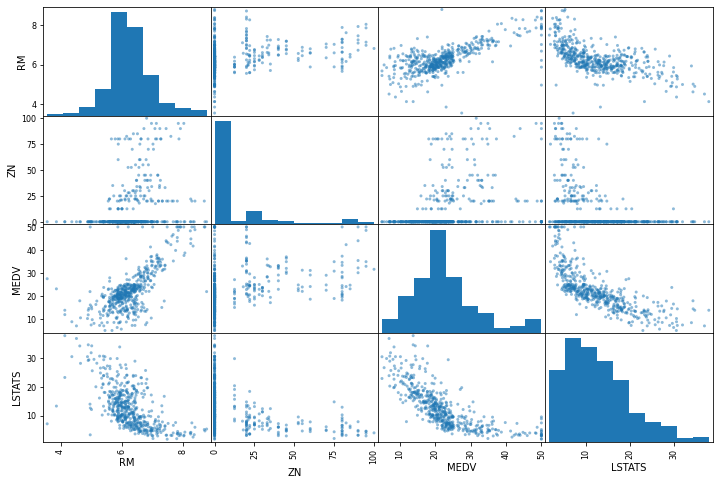

In [21]:
from pandas.plotting import scatter_matrix
attributes=['RM', 'ZN', 'MEDV', 'LSTATS']
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

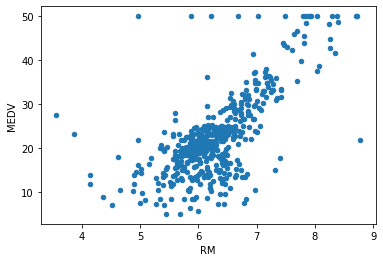

In [22]:
housing.plot(kind="scatter",x='RM', y='MEDV', alpha=1)

In [23]:
# above data is kind of wrong because if the number of RM (rooms per dwelling) 
# is more then the prices is supposed to be higher, but here the data is capped at 
# 50. Therefore, we will remove those out-liers (delete certain data) so 
# that our ML algorithm works well.

In [24]:
##TRYING OUT ATTRIBUTE COMBINATIONS

In [25]:
#making an attribute called tax per room. Trying out attributes because we need
# to make this data efficient.
housing['TAXRM']=housing['TAX']/housing['RM']

In [26]:
housing.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTATS,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [27]:
corr_matrix=housing.corr()
(corr_matrix['MEDV']).sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.537650
LSTATS    -0.737663
Name: MEDV, dtype: float64

In [28]:
#plotting TAXRM with MEDV.

In [29]:
# housing.plot(kind="scatter",x='TAXRM', y='MEDV', alpha=1)

In [30]:
housing=strat_train_set.drop('MEDV', axis=1)
housing_labels=strat_train_set['MEDV'].copy()

In [31]:
#Now we can simply remove the outliers and make the data set more efficient.
##to take care of the missing attributes, you have three options:
# 1. get rid of the missing data points
# 2. get rid of the whole attribute
# 3. set the value to some value(0, mean or median)

In [32]:
# a=housing.dropna(subset=['RM']) #option 1
# a.shape

In [33]:
housing.drop("RM", axis=1).shape #option 2 there's no RM column and also that that original housing data is unchanged.

(404, 12)

In [34]:
# median=housing['RM'].median() #option 3

In [35]:
# housing['RM'].fillna(median) #option 3 (filling the na values with median)

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer( strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_


array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [38]:
 x=imputer.transform(housing) #this will fit all the na values in the dataset with 
# medians
housing_tr=pd.DataFrame(x, columns=housing.columns)

## Scikite-learn Design

feature scaling

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer', SimpleImputer(strategy="median")), #can add many
                    ('std_scaler', StandardScaler())])

In [40]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [41]:
housing_num_tr.shape

(404, 13)

Selecting a desired model for our ML problem

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [43]:
some_data=housing.iloc[:5]

In [44]:
some_labels=housing_labels.iloc[:5]


In [45]:
prepared_data=my_pipeline.transform(some_data)

In [46]:
model.predict(prepared_data)

array([22.335, 25.374, 16.524, 23.356, 23.54 ])

In [47]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [48]:
#evaluating the model

In [49]:
from sklearn.metrics import mean_squared_error

housing_predictions=model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels, housing_predictions)
lin_rmse=np.sqrt(lin_mse)

In [50]:
lin_rmse

1.1707958990057614

##the model i s overfitted h ere, so we use a use a better evaluation technique-cross validation

In [51]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)


In [52]:
rmse_scores

array([2.88650396, 2.92650515, 4.46851915, 2.63888892, 3.53644539,
       2.63084474, 4.50641234, 3.39451172, 3.13580322, 3.30022363])

In [53]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [54]:
print_scores(rmse_scores)

Scores: [2.88650396 2.92650515 4.46851915 2.63888892 3.53644539 2.63084474
 4.50641234 3.39451172 3.13580322 3.30022363]
Mean: 3.3424658226254045
Standard deviation: 0.6395269974721238


## Saving the model



In [55]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the model on test data

In [56]:
x_test=strat_test_set.drop('MEDV', axis=1)
y_test=strat_test_set['MEDV'].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test, final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions, list(y_test))

[24.942 11.115 25.51  22.282 18.992 14.796 20.38  14.346 32.308 41.669
 19.597 11.423 23.51  28.069 19.562 11.291 31.329 14.815 23.712 18.854
 19.588 17.854 17.268 21.891 18.575 31.756 15.901 33.198  8.652 33.677
 23.646 21.122 22.46  10.769 21.052 10.684 43.824 24.381 23.259 42.64
 23.668 29.507 20.871 20.868 18.673 33.591 44.072 20.123 19.832 21.865
 21.122 14.532 21.372 14.635 25.019 32.937 41.546 29.395 19.748 20.735
 46.729  9.877 18.806 24.706 15.063 32.481 19.785 17.758 19.13  34.763
 25.363 22.615 21.131 22.278 34.575 12.938 15.85  20.121 20.703 21.384
 22.334 20.783 14.028 22.944 20.947 21.205 13.795 21.28  21.855 23.294
 18.952 26.974  7.675 26.393 18.658 29.224 19.641 30.97  14.721 26.442
 21.519 20.549] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [57]:
final_rmse

2.9741671844697066

In [58]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [ ]:
from joblib import dump, load
import numpy as np
model=load('Dragon.joblib')
features=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.04141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)